In [54]:
import pandas as pd
import numpy as np
import os
import re

In [142]:
df = pd.read_csv("products.csv")
dairy = pd.read_csv("dairy.txt", header = None)

In [107]:
#Get separate df for unique ingredients and count of each

ing_dict = {}
ing_list = []
for i in range(len(df)):
    ing_i = df["ingredients"][i]
    ing_split = re.split(r'[.,]\s*(?![^()]*\))', ing_i)
    for ele in ing_split:
        if ele in ing_dict.keys():
            ing_dict[ele] = ing_dict[ele] + 1
        else:
            ing_dict[ele] = 1
    ing_list.append(ing_split)
ing_flat = [ing for sublist in ing_list for ing in sublist]
ingredients = list(set(ing_flat))

ing_df = pd.DataFrame.from_dict(ing_dict, orient = 'index', columns = ["Count"]).sort_values(by = "Count", ascending = False)

In [155]:
is_dairy = []
for val in ingredients:
    if val in dairy[0].to_list():
        is_diary.append(val)

In [174]:
sub_ing_dict = {}
sub_ing_list = []
for i in range(len(ingredients)):
    sub_ing_i = ingredients[i]
    sub_ing_split = sub_ing_i.split(",")
    for ele in sub_ing_split:
        if ele in sub_ing_dict.keys():
            sub_ing_dict[ele] = sub_ing_dict[ele] + 1
        else:
            sub_ing_dict[ele] = 1
    sub_ing_list.append(sub_ing_split)
sub_ing_flat = [ing for sublist in sub_ing_list for ing in sublist]
sub_ingredients = list(set(sub_ing_flat))

In [175]:
sub_ingredients

['COCONUT CREAM',
 'CORN SYRUP†',
 'ORGANIC EGG WHITES AND EGG YOLKS',
 'CONDENSED SKIM MILK',
 'CHEESECAKE PIECES WITH GRAHAM CRUST',
 'DUTCHED COCOA (PROCESSED WITH ALKALI)',
 'WHOLE WHEAT/GRAHAM FLOUR',
 'GREEN TEA',
 'DARK CHOCOLATE (BELGIAN CHOCOLATE',
 'VEGETABLE GUM (GUAR)',
 'DARK CHOCOLATE DRIZZLE WITH VEGETABLE OIL: DARK CHOCOLATE (SUGAR',
 'CARROT JUICE CONCENTRATE',
 'COCONUT',
 ' SUGAR)',
 'EGG AND SOY INGREDIENTS',
 'MODIFIED CORN STARCH',
 ' SODIUM BICARBONATE',
 'CONDENSED MILK',
 'PUMPKIN',
 'CARRAGEENAN',
 'CAROB BEAN',
 'CINNAMON',
 'ENZYMES',
 'MANGO',
 'FRUIT AND VEGETABLE JUICE (FOR COLOR)',
 'VANILLA BEAN SEEDS',
 'UNBLEACHED ENRICHED FLOUR',
 'CHOCOLATE ICE CREAM: CREAM',
 ' PEPPERMINT OIL',
 'LEMON PEEL',
 'MONOCALCIUM PHOSPHATE',
 'HEAVY CREAM',
 'CAROB BEAN GUM',
 'VANILLA BEANS',
 'CHERRY CONCENTRATE (FOR COLOR)',
 'BLACK RASPBERRY PUREE',
 ' RIBOFLAVIN',
 'ORGANIC GINGER',
 'NUTMEG',
 'SOYBEAN',
 'TAPIOCA FLOUR',
 'THIAMINE MONONITRATE',
 'COCOA (PROCESSED 

In [165]:
for i in range(len(ingredients)):
    print(ingredients[i].split(","))

['COCONUT CREAM']
['CORN SYRUP†']
['MILK CHOCOLATE AND VEGETABLE OIL COATING: MILK CHOCOLATE (SUGAR', ' WHOLE MILK POWDER', ' CHOCOLATE', ' COCOA BUTTER', ' SOY LECITHIN', ' VANILLA EXTRACT)']
['ORGANIC EGG WHITES AND EGG YOLKS']
['CONDENSED SKIM MILK']
['CHEESECAKE PIECES WITH GRAHAM CRUST']
['DUTCHED COCOA (PROCESSED WITH ALKALI)']
['BUTTER (CREAM', ' SALT)']
['WHOLE WHEAT/GRAHAM FLOUR']
['GREEN TEA']
['VEGETABLE GUM (GUAR)']
['CARROT JUICE CONCENTRATE']
['COCONUT']
['EGG AND SOY INGREDIENTS']
['ENRICHED WHEAT FLOUR (WHEAT FLOUR', ' NIACIN', ' REDUCED IRON', ' THIAMIN MONONITRATE', ' RIBOFLAVIN', ' FOLIC ACID)']
['ENRICHED FLOUR (WHEAT FLOUR', ' NIACIN', ' REDUCED IRON', ' THAIMIN MONONITRATE', ' RIBOFLAVIN', ' FOLIC ACID)']
['MODIFIED CORN STARCH']
['CONDENSED MILK']
['POWDERED SUGAR (CANE SUGAR', ' CORNSTARCH)']
['PUMPKIN']
['CARRAGEENAN']
['CAROB BEAN']
['ENRICHED FLOUR (WHEAT FLOUR', ' NIACIN', ' REDUCED IRON', ' THIAMIN MONONITRATE', ' RIBOFLAVIN', ' FOLIC ACID)']
['CINNAMON']
[

In [130]:
#append ingredients_count column to dataframe

ingCount = []
top20_dict = {}
for i in range(len(df)):
    ing_split = re.split(r'[.,]\s*(?![^()]*\))', df["ingredients"][i])
    ingCount.append(len(ing_split))
    top20_dict[df["key"][i]] = ing_split[0:20]
df["ingredients_count"] = ingCount
df.sort_values(by = "ingredients_count", ascending = False)

,brand,key,name,subhead,description,rating,rating_count,ingredients,ingredients_count
204,breyers,32_breyers,SNICKERS® & M&M'S® 2in1,NaN,SNICKERS® or M&M'S®? When it comes to your fav...,3.9,52,"SKIM MILK, SUGAR, SNICKERS PIECES*, MILK CHOCO...",77
217,breyers,45_breyers,New York Style Cheesecake,NaN,"Can’t get enough of rich, creamy cheesecake? Y...",3.3,36,"NONFAT MILK, STRAWBERRY SWIRL, WATER, SUGAR, C...",69
240,breyers,68_breyers,Layered Dessert Brownie Cheesecake,NaN,Love brownie cheesecake? What about Breyers®? ...,2.8,25,"MILK, CORN SYRUP, SUGAR, ENRICHED WHEAT FLOUR,...",67
203,breyers,31_breyers,SNICKERS®,NaN,Breyers® joins forces with America’s favorite ...,4.4,109,"SKIM MILK, SUGAR, CARAMEL SWIRL, CORN SYRUP, W...",62
201,breyers,29_breyers,REESE'S & REESE'S PIECES 2in1,NaN,REESE'S PIECES or REESE'S Peanut Butter Cups? ...,3.3,88,"MILK, CORN SYRUP, REESE'S PEANUT BUTTER CUP PI...",59
...,...,...,...,...,...,...,...,...,...
66,hd,9_hd,Chocolate Ice Cream,NaN,"Rich, creamy, and totally indulgent. Made from...",4.9,90,"CREAM, SKIM MILK, CANE SUGAR, COCOA PROCESSED ...",5
116,hd,59_hd,Vanilla Ice Cream,NaN,Vanilla is the essence of elegance and sophist...,3.0,228,"CREAM, SKIM MILK, CANE SUGAR, EGG YOLKS, VANIL...",5
172,breyers,0_breyers,Natural Vanilla,NaN,Our Original Vanilla Ice Cream. The way vanill...,4.1,467,"MILK, CREAM, SUGAR, VEGETABLE GUM (TARA), NATU...",5
78,hd,21_hd,Coffee Ice Cream,NaN,We roast the finest Brazilian coffee beans and...,4.6,173,"CREAM, SKIM MILK, CANE SUGAR, EGG YOLKS, COFFEE",5


<AxesSubplot:>

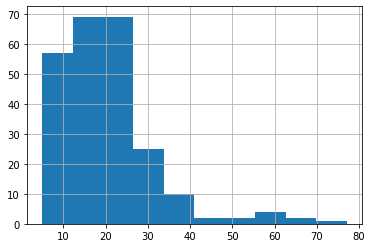

In [109]:
#histogram of ingredients count

df["ingredients_count"].hist()

In [113]:
df["ingredients_count"].describe()

count    241.000000
mean      20.369295
std       11.384956
min        5.000000
25%       13.000000
50%       19.000000
75%       25.000000
max       77.000000
Name: ingredients_count, dtype: float64

In [135]:
pd.DataFrame.from_dict(top20_dict, orient = "index")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0_bj,CREAM,SKIM MILK,"LIQUID SUGAR (SUGAR, WATER)",WATER,BROWN SUGAR,SUGAR,MILK,WHEAT FLOUR,EGG YOLKS,CORN SYRUP,EGGS,"BUTTER (CREAM, SALT)",BUTTEROIL,PECTIN,SEA SALT,SOYBEAN OIL,VANILLA EXTRACT,GUAR GUM,SOY LECITHIN,"BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODI..."
1_bj,CREAM,SKIM MILK,"LIQUID SUGAR (SUGAR, WATER)",WATER,SUGAR,PEANUTS,WHEAT FLOUR,CANOLA OIL,EGG YOLKS,CORN STARCH,PEANUT OIL,COCOA POWDER,SALT,SOYBEAN OIL,INVERT CANE SUGAR,MILK FAT,EGGS,EGG WHITES,GUAR GUM,SOY LECITHIN
2_bj,CREAM,"LIQUID SUGAR (SUGAR, WATER)",SKIM MILK,WATER,SUGAR,COCOA (PROCESSED WITH ALKALI),POTATO,COCONUT OIL,CORN SYRUP SOLIDS,SOYBEAN OIL,EGG YOLKS,RICE STARCH,SUNFLOWER OIL,BARLEY MALT,COCOA POWDER,WHEAT FLOUR,MILK,SALT,SOY LECITHIN,YEAST EXTRACT
3_bj,CREAM,SKIM MILK,"LIQUID SUGAR (SUGAR, WATER)",WATER,CORN SYRUP,COCONUT OIL,SUGAR,DRIED CANE SYRUP,EGG YOLKS,WHEAT FLOUR,MILK,COCOA,NATURAL FLAVOR,GUAR GUM,SOY LECITHIN,BUTTER OIL,NATURAL FLAVORS,LOCUST BEAN GUM,SALT,CITRIC ACID
4_bj,CREAM,SKIM MILK,WATER,"LIQUID SUGAR (SUGAR, WATER)",SUGAR,CANOLA OIL,SOYBEAN OIL,EGG YOLKS,CORN SYRUP,WHEAT FLOUR,COCONUT OIL,CORN STARCH,COCOA (PROCESSED WITH ALKALI),CORN SYRUP SOLIDS,COCOA,GRAHAM FLOUR,SALT,EGG WHITES,BUTTEROIL,TAPIOCA STARCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64_breyers,MILK,CORN SYRUP,SUGAR,BROWN SUGAR,SOYBEAN OIL,WATER,BUTTER,CREAM,SALT,CORN SYRUP,SPICE,SALT,SOYBEAN LECITHIN,VANILLA EXTRACT,DRIED CANE SYRUP,UNBLEACHED UNENRICHED WHEAT FLOUR,COCONUT OIL,WATER,BUTTER,CREAM
65_breyers,MILK,WATER,CARAMEL SWIRL,SUGAR,WATER,CORN SYRUP,HIGH FRUCTOSE CORN SYRUP,NONFAT MILK SOLIDS,BUTTER,CREAM,SALT,SALT,MOLASSES,PECTIN,SOY LECITHIN,NATURAL FLAVOR,POTASSIUM SORBATE (PRESERVATIVE),SODIUM CITRATE,LACTIC ACID,MALTITOL SYRUP
66_breyers,MILK,CORN SYRUP,SUGAR,WHEAT FLOUR,BUTTER,CREAM (MILK),SALT,PALM OIL,CORN SYRUP,NONFAT MILK,WATER,RICE FLOUR,NATURAL FLAVORS,SALT,WHEAT FLOUR,SUGAR,PALM OIL,MOLASSES,SPICES,SALT
67_breyers,MILK,CORN SYRUP,ENRICHED WHEAT FLOUR,WHEAT FLOUR,NIACIN,REDUCED IRON,THIAMIN MONONITRATE,RIBOFLAVIN,FOLIC ACID,SUGAR,BUTTER,CREAM,SALT,CANOLA OIL,SKIM MILK POWDER,SALT,SODIUM BICARBONATE,PEACHES,FRUCTOSE,COCONUT OIL


In [123]:
test_list = [
    ["a", "b", "c"],
    [1, 2, 3]
]

test_dict = {}
n = 0
for item in test_list:
    test_dict[n] = item
    n = n + 1

test_df = pd.DataFrame(data = test_dict)
test_df

,0,1
0,a,1
1,b,2
2,c,3


In [34]:
col_list = pd.DataFrame(data = df.columns.to_list()[:-1]).append(ingredients)[0]
df2 = pd.DataFrame(columns = col_list)

In [38]:
df3 = pd.concat([df, df["ingredients"].str.split(",", expand = True)], axis = 1)

In [136]:
dairy = [
    "Cream",
    "Milk",
    
]

,Count
SUGAR,310
CREAM,250
SALT,219
SOY LECITHIN,166
NATURAL FLAVOR,165
...,...
"DARK CHOCOLATE AND VEGETABLE OIL COATING: DARK CHOCOLATE (SUGAR, CHOCOLATE, SOY LECITHIN, VANILLA EXTRACT)",1
PEANUT BUTTER FROZEN DESSERT: WATER,1
PUMPKIN JUICE CONCENTRATE,1
CARROT JUICE CONCENTRATE,1


In [15]:
df.head()

,brand,key,name,subhead,description,rating,rating_count,ingredients
0,bj,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,bj,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [15]:
df["ingredients"][0]

'CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE'

In [20]:
pd.DataFrame(data = df.iloc[0])

,0
brand,bj
key,0_bj
name,Salted Caramel Core
subhead,Sweet Cream Ice Cream with Blonde Brownies & a...
description,Find your way to the ultimate ice cream experi...
rating,3.7
rating_count,208
ingredients,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
